In [2]:
#importing necessary python libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"/kaggle/input/youtube-data-analysis/Python_youtube_Analysis-master/video_id_info.csv", on_bad_lines = 'skip')

/tmp/ipykernel_34/155723613.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"/kaggle/input/youtube-data-analysis/Python_youtube_Analysis-master/video_id_info.csv", on_bad_lines = 'skip')


In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
#using inplace = True for memory optimisation
df.dropna(inplace = True)

In [7]:
#null values removed
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# **sentiment analysis**

In [ ]:
!pip install textblob
import sys
from textblob import TextBlob

In [9]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [10]:
df.shape

(691374, 4)

In [11]:
sample_df = df[0:1000]

In [12]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [13]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [14]:
polarity = []

for comment in df["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [15]:
len(polarity)

691374

In [16]:
df["polarity"] = polarity

In [17]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# **Wordcloud analysis of the data**

In [18]:
filter1 = df['polarity'] == 1
positive_comments=df[filter1]

In [19]:
filter2 = df['polarity'] == -1
negative_comments=df[filter2]

In [20]:
!pip install wordcloud
import sys
from wordcloud import WordCloud, STOPWORDS

In [21]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
total_positive_comments = " ".join(positive_comments["comment_text"])
print(total_positive_comments)

In [23]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)

(-0.5, 399.5, 199.5, -0.5)

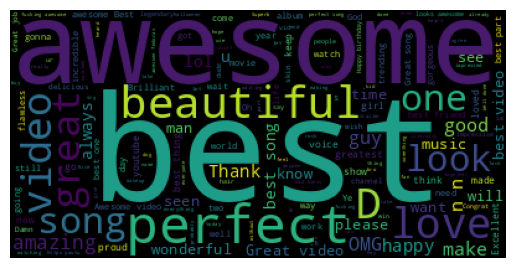

In [ ]:
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
total_negative_comments = " ".join(negative_comments["comment_text"])

In [26]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)

(-0.5, 399.5, 199.5, -0.5)

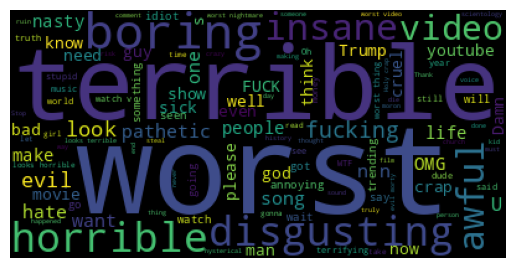

In [27]:
plt.imshow(wordcloud)
plt.axis("off")

# **Perfect Emoji Analysis**

In [28]:
!pip install emoji==2.10.1
import sys
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: emoji
    Found existing installation: emoji 2.12.1
    Uninstalling emoji-2.12.1:
      Successfully uninstalled emoji-2.12.1


In [29]:
emoji.__version__

'2.10.1'

In [30]:
df['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [31]:
all_emoji_list = []

for comment in df['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

In [32]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [33]:
from collections import Counter

In [34]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [35]:
freq = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]
freq    

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [36]:
emoji = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]
emoji    

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [37]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [38]:
import plotly.io as pio
pio.renderers.default =  'iframe_connected'

In [39]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [40]:
trace = go.Bar(x=emoji,y=freq)
iplot([trace])

### *conclusion : majority of the viewers are happy as they are using emojis that depict happy, fun, love, heart ....*

# Collect entire data of youtube!

In [41]:
import os

In [42]:
files = os.listdir("/kaggle/input/youtube-data-analysis/Python_youtube_Analysis-master/YT_additional_data")
files

['GBvideos.csv',
 'MXvideos.csv',
 'KRvideos.csv',
 'MX_category_id.json',
 'GB_category_id.json',
 'US_category_id.json',
 'README.md',
 'IN_category_id.json',
 'DEvideos.csv',
 'KR_category_id.json',
 'RU_category_id.json',
 'FRvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'RUvideos.csv',
 'CA_category_id.json',
 'DE_category_id.json',
 'JP_category_id.json',
 'JPvideos.csv',
 'FR_category_id.json',
 'CAvideos.csv']

In [43]:
files_csv = [file for file in files if '.csv' in file]
files_csv

['GBvideos.csv',
 'MXvideos.csv',
 'KRvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'RUvideos.csv',
 'JPvideos.csv',
 'CAvideos.csv']

In [48]:
import os
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [112]:
full_df = pd.DataFrame()  
path = '/kaggle/input/youtube-data-analysis/Python_youtube_Analysis-master/YT_additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [52]:
full_df.shape

(375942, 16)

In [53]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [54]:
full_df[full_df.duplicated()].shape

(34053, 16)

In [55]:
full_df = full_df.drop_duplicates()

In [56]:
full_df.shape

(341889, 16)

In [114]:

full_df[0:1000].to_csv('/kaggle/working/youtube_sample.csv' , index=False)


In [115]:
full_df[0:1000].to_json('/kaggle/working/youtube_sample.json')

# Which category has the maximum likes? 

In [116]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [117]:
full_df['category_id'].unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43, 44,
       30])

In [118]:
## lets read json file ..
json_df = pd.read_json('/kaggle/input/youtube-data-analysis/Python_youtube_Analysis-master/YT_additional_data/US_category_id.json')
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [119]:
json_df['items'][0]

### retrieves the first item (index 0) from the 'items' column of the DataFrame

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [120]:
#now i want id and title in a dictionary  
cat_dict = {} #empty dict 


for item in json_df['items'].values:     #values here return the array representation 
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[int(item['id'])] = item['snippet']['title'] # snippet here is the sub dict so we have to write this way  ['snippet']['title']
    
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [121]:
full_df['category_name'] = full_df['category_id'].map(cat_dict) 
full_df['category_name']
#maps category IDs in the 'category_id' column of full_df DataFrame to their corresponding category titles using the cat_dict dictionary.

0           Howto & Style
1           Entertainment
2                   Music
3                  Sports
4         News & Politics
               ...       
375937      Entertainment
375938      Entertainment
375939             Gaming
375940    News & Politics
375941      Entertainment
Name: category_name, Length: 375942, dtype: object

In [122]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports


# which category has the maximum likes ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Howto & Style'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Music'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'News & Politics'),
  Text(5, 0, 'People & Blogs'),
  Text(6, 0, 'Comedy'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Pets & Animals'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Film & Animation'),
  Text(11, 0, 'Gaming'),
  Text(12, 0, 'Autos & Vehicles'),
  Text(13, 0, 'Travel & Events'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Trailers'),
  Text(17, 0, 'Movies')])

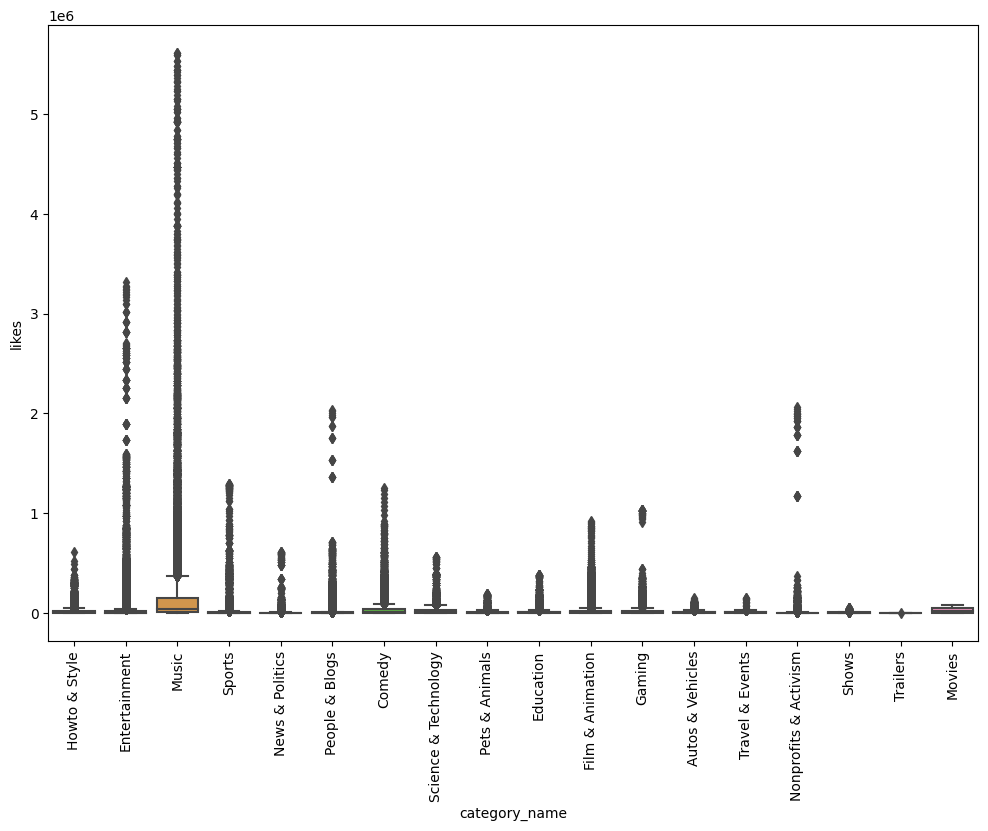

In [134]:
plt.figure(figsize=(12,8))#Creates a new figure with a specified size of 12 inches by 8 inches for better visualization.
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

# Find out whether audience is engaged or not

like rate ,dislike , comment_count_rate

In [135]:
(full_df['likes']/full_df['views'])*100

0         0.770723
1         2.425989
2         4.589075
3         0.693421
4         0.305655
            ...   
375937    2.108199
375938    0.445137
375939    3.349079
375940    1.835539
375941    0.279350
Length: 375942, dtype: float64

In [136]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

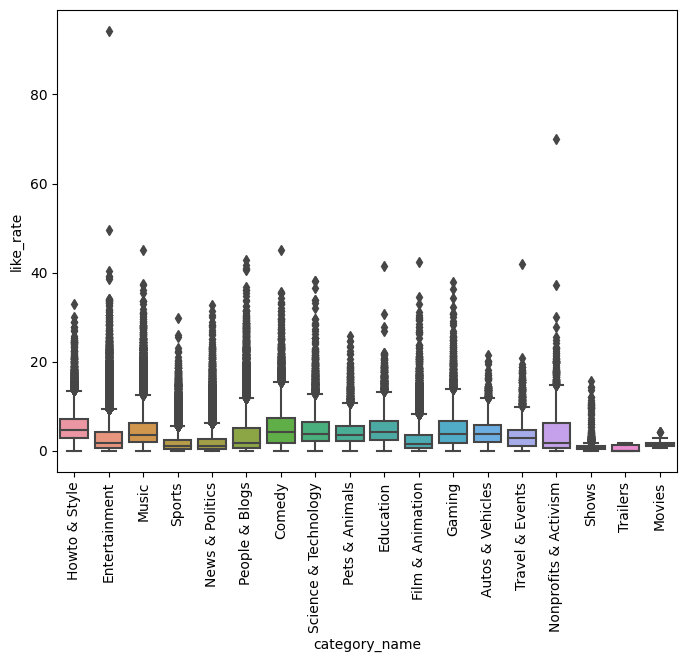

In [138]:
#creating box plot for like rate
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

# Analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

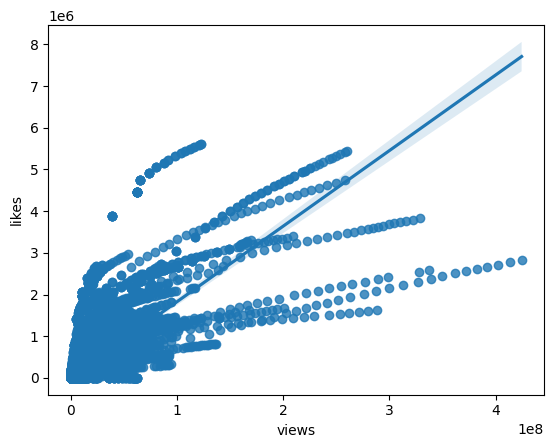

In [139]:
#using Regression plot
#regression plot is nothing but it is the combination of a scatter plot + a regression kine on top of that
sns.regplot(x='views' , y='likes' , data = full_df)

In [140]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [141]:
full_df[['views', 'likes', 'dislikes']]

,views,likes,dislikes
0,7224515,55681,10247
1,1053632,25561,2294
2,17158579,787420,43420
3,27833,193,12
4,9815,30,2
...,...,...,...
375937,80685,1701,99
375938,103339,460,66
375939,773347,25900,224
375940,115225,2115,182


In [142]:
full_df[['views', 'likes', 'dislikes']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

,views,likes,dislikes
views,1.000000,0.777796,0.421653
likes,0.777796,1.000000,0.453710
dislikes,0.421653,0.453710,1.000000


<Axes: >

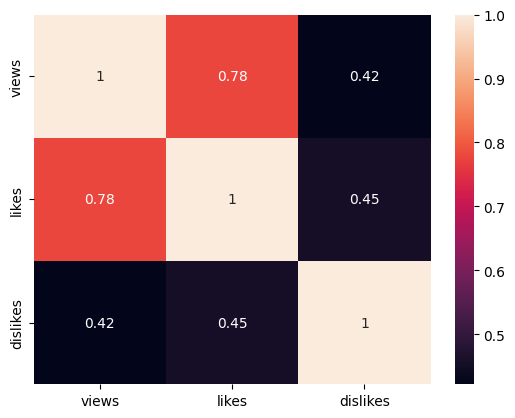

In [143]:
#Now if you want to showcase this correlation table in a vsiualized way , you can use the heatmap
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True) 
#When annot=True, numerical values are displayed on the heatmap cells

# Which channels have the largest number of trending videos?

In [144]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,0.770723,0.141837,0.131206
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,2.425989,0.217723,0.261666
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589075,0.253051,0.733639
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports,0.693421,0.043114,0.132936
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,0.305655,0.020377,0.305655
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,âº HOW MY RELATIONSHIP STARTED!\nâº PB Merch...,Entertainment,4.456300,0.120987,0.197248


In [145]:
full_df['channel_title'].value_counts() 

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
LIGAMX Femenil                          1
MundoNovelas HD                         1
Le Dudette                              1
Ð¡ÑÐ´ÐµÐ±ÐµÐ½ ÑÐ¿Ð¾Ñ                 1
SevenSuperGirls                         1
Name: count, Length: 37824, dtype: int64

In [146]:
full_df.groupby(['channel_title']).size()

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    4
                                          ..
ï¼åã§ã§ãã DIY                     8
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37824, dtype: int64

In [147]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index() 
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [148]:
cdf = cdf.rename(columns={0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [149]:
import plotly.express as px
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')